# ウェブとグラフ

In [1]:
import numpy as np
import networkx as nx

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

## ウェブ

**ウェブ（World wide web; Web）** は，インターネット上に構築された**ハイパーテキスト（hypertext）** システムである．
ハイパーテキストとは文書同士をハイパーリンク（単にリンクと呼ぶことも）をつなぐ仕組みである．
勘違いされやすいが，インターネットは通信網であって「インターネット = ウェブ」ではない．

ウェブはウェブページをノード，リンクをエッジと見れば，グラフと見なすことができる（より厳密には有向グラフである）．
ウェブページは数100億，ウェブページ間のリンクは数兆あると言われており，ウェブは社会に存在する最も巨大なグラフと言える．

<img src="https://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture5/imag.jpg" width="50%">

ウェブには，玉石混淆ではあるが，様々なトピックに関するウェブページが日々アップロードされている．
今日，ウェブは貴重な知識源の1つであることに異論はないであろう．
そのようなウェブからウェブページを見つけるためのツールが検索エンジンである．

検索エンジンは，日々リンクを辿ってウェブページを巡回し，データベースに格納し，検索のための索引づけを行っている．
伝統的な検索エンジンは，検索ワードと文書との関連性をランキング指標として，データベースに格納された文書をランキングしていた．
検索ワードと文書の関連性は，直感的には「検索ワードに関連した語がどの程度出現するか」で評価される．

検索対象となるウェブページ数が少ない場合，検索ワードとの関連性でウェブページを評価する方法でも良い．
しかし，ウェブページは膨大にあるため，検索ワードの関連性だけでは有用なウェブページを絞りきれない．
また，検索ワードとして入力そうな語をウェブページにたくさん入れておけば，ランキングを上げることもできてしまう．
そのため，検索ワードに対する関連性以外の観点からも，ウェブページの重要度を評価する方法が必要となる．

以降で説明する**PageRank**と**HITS**は，ウェブのグラフとして特徴を活かし，ウェブページの重要性を評価するウェブ黎明期に発表された重要なアルゴリズムである．
これらアルゴリズムが発表されて以降，これらアルゴリズムを改善，発展させたアルゴリズムが多数登場している．


## PageRank

[PageRank](https://research.google/pubs/the-anatomy-of-a-large-scale-hypertextual-web-search-engine/)はGoogleの創業者であるSergey BrinとLarry Pageが提案したアルゴリズムである．
Googleの検索エンジンはPageRankの実装により，ウェブ検索エンジンのトップランナーに躍り出た．

PageRankはウェブページに張られたリンクを一種の「投票」と見なし，ウェブページの重要度（PageRank値）を計算する．
PageRankは，重要度の計算のために，以下のような仮定を置く．

> 多くの重要なウェブページからリンクされたウェブページほど重要である

ご覧の通り，この仮定は再帰的（堂々巡り）であるが，実際の計算ではどう対応するのであろうか．

### 単純なPageRank

シンプルなPageRankアルゴリズムは，以下の手順でウェブページの重要度を計算する：

1. 計算対象とするウェブページ群$W$を用意する（ウェブページはN個あるとする）
2. 各ウェブページ$w \in W$のPageRank値$p(w)$を$\frac{1}{N}$で初期化する
3. ウェブページ$w$にリンクするウェブページ集合を$W_{to}(w)$とする．このとき，すべてのウェブページのPageRank値を以下の式で更新する．なお，ウェブページ$w$のPageRank値の初期値は$p_0(w)$に対応する．また，$deg_{out}(w)$はウェブページ$w$の出次数を表す．

$$
p_{n+1}(w) = \sum_{w_{to} \in W_{to}(w)}\frac{1}{deg_{out}(w_{to})}p_n(w_{to})
$$

4. PageRank値が収束するまで，ステップ3の処理を繰り返す．


上記手順について，下記グラフ$G$を用いて具体的に考えてみよう．

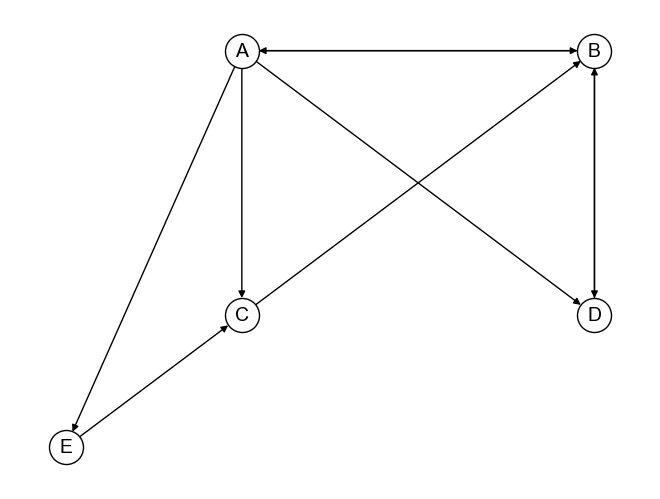

In [3]:
G = nx.DiGraph([
    ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'),
    ('B', 'A'), ('B', 'D'),
    ('C', 'B'),
    ('D', 'B'),
    ('E', 'C')
])


pos = {'A':[0,0], 'B':[1, 0], 'C':[0, -1], 'D':[1, -1], 'E':[-0.5, -1.5]}

nx.draw(G, pos, **DRAW_CONFIG)

まず，PageRank値を初期化する．
上記グラフ$G$はノード数が5であるため，どのノードもPageRankの初期値は$\frac{1}{5}$となる．

次のステップでは，PageRank値を更新する．
ここでは，ノードDのPageRank値を更新することを考えてみよう．
ノードDはノードAとノードBからリンクされている．
よって，更新式に従うと，ノードDのPageRank値はノードAとノードBのPageRank値によって更新される．

![](img/simple-pagerank-calculation.jpg)

現時点でのノードAのPageRank値は$\frac{1}{5}$である．
また，上図のように，ノードAはB，C，D，Eの4つのノードにリンクを張っている．
それゆえ，更新式に従うと，ノードDにはノードAのもつPageRank値（$=\frac{1}{5}$）の$\frac{1}{4}$が配分される．
同様に，ノードBからもノードDに$\frac{1}{2} \times \frac{1}{5}$のPageRank値が配分される．
この配分によって，ノードDのPageRank値は

$$
\begin{eqnarray}
p_1(D) &= \frac{1}{4} \times p_0(C) + \frac{1}{2} \times p_0(B) \\
&= \frac{1}{4} \times \frac{1}{5} + \frac{1}{2} \times \frac{1}{5} = \frac{3}{20}
\end{eqnarray}
$$

と更新される．
他のノードも同様の処理を行うと，1回目の更新で以下のようになる．

![](img/simple-pagerank-calculation-2.jpg)


この処理について，すべてのノードのPageRank値が収束するまで繰り返す．
値は徐々に変化しなくなり，最終的には以下のように落ち着く．
収束したときの値が，最終的なPageRank値となる．

![](img/simple-pagerank-calculation-3.jpg)

以上が単純なPageRankの計算手順であるが，行列を用いると計算を効率よく行える．
以下は，上で説明したPageRankの計算手順を行列を用いて書き直したものである．

1. 計算対象とするウェブページ群$W$を，その隣接行列を$\boldsymbol{A}$とする．また，隣接行列$\boldsymbol{A}$の各行の値を行の値の合計値で正規化した行列を$\boldsymbol{M}$とする（遷移確率行列）．
2. 各ウェブページのPageRank値を格納したベクトルを$\boldsymbol{p}$とし，その要素値を$\frac{1}{N}$で初期化する（$N$はウェブページの数）．
3. 以下の式でPageRankベクトルを更新する（$\boldsymbol{p}_{0}$が初期値となる）

$$
\boldsymbol{p}_{n+1} = \boldsymbol{M}^T \boldsymbol{p}_{n}
$$

4. PageRank値が収束するまで，ステップ3の処理を繰り返す．

NumPyを用いれば，上記PageRankの計算手順は簡単に書ける．
以下は，例で用いたグラフ$G$の各ノードのPageRank値を求めるPythonコードである．

In [4]:
import networkx as nx
import numpy as np

# 行列の正規化のために使う
from sklearn.preprocessing import normalize


# グラフの定義
G = nx.DiGraph([
    ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'),
    ('B', 'A'), ('B', 'D'),
    ('C', 'B'),
    ('D', 'B'),
    ('E', 'C')
])


# PageRankベクトルを初期化する
N = G.number_of_nodes()
p = np.ones(N).reshape(-1, 1) # 要素値1，要素数がNの縦ベクトル
p = p / N 


# 隣接行列
A = nx.adjacency_matrix(G).toarray()
# 遷移確率行列
M = normalize(A, norm='l1', axis=1)

# PageRank値の更新．100回繰り返せば値は収束する
for i in range(100):
    p = np.dot(M.T, p)

p

array([[0.2 ],
       [0.4 ],
       [0.1 ],
       [0.25],
       [0.05]])

上記のPageRankはシンプルであり役に立ちそうだが，この方法を用いてもウェブページの重要度を計算できない．
ウェブグラフ中に，以下のようなデッドエンドやスパイダーとラップと呼ばれる構造を含んでいると，PageRankが意図しない値に収束してしまうのである．
この問題を解決するために，オリジナルのPageRankアルゴリズムは一工夫をしている．

![](img/deadend-and-spidertrap.jpg)

### 完全なPageRank

デッドエンド問題やスパイダートラップ問題を解決するために，オリジナルのPageRankアルゴリズムでは**ランダムサーファーモデル（random surfer model）** という仮定を導入している．
あなたがウェブブラウジングをしている時を想像してほしい．
ブラウジングをする際，ウェブページ内のリンクをクリックして別のページに移動することもあれば，ブックマークやQRコードなどURLを直接指定して（リンクを辿らず）ウェブページに飛ぶこともあるだろう．
ランダムサーファーモデルとは，ユーザは「リンクによるページ移動」と「直接ページ移動（ジャンプ）」を切り替えながらページを移動する，という仮定である．
この仮定を反映するようにシンプルなPageRankを修正することで，ウェブグラフ中にどんな構造があっても

> 多くの重要なウェブページからリンクされたウェブページほど重要である

という仮定を踏まえたPageRank値を計算することが可能となる．

以下，修正を施した完全なPageRank値を計算手順である．

1. 計算対象とするウェブページ群$W$を，その隣接行列を$\boldsymbol{A}$とする．また，隣接行列$\boldsymbol{A}$の各行の値を行の値の合計値で正規化した行列を$\boldsymbol{M}$とする（遷移確率行列）．
2. 各ウェブページのPageRank値を格納した縦ベクトルを$\boldsymbol{p}$とし，その要素値を$\frac{1}{N}$で初期化する（$N$はウェブページの数）．
3. 以下の式でPageRankベクトルを更新する．なお，$\alpha$は事前に指定した定数である．また，$\boldsymbol{e}$は要素数が$N$，要素が1の縦ベクトルである．

$$
\boldsymbol{p}_{n+1} = \alpha \boldsymbol{M}^T \boldsymbol{p}_{n} + (1 - \alpha) \frac{\boldsymbol{e}}{N}
$$

4. PageRank値が収束するまで，ステップ3の処理を繰り返す．

シンプルなPageRankとの違いはステップ3の更新式である．
式中の$\boldsymbol{M}^T \boldsymbol{p}_{n}$は「リンクを辿る行動」によるPageRank値の更新に対応する．
一方，$\frac{\boldsymbol{e}}{N}$は「リンクを辿らず，直接ページを訪問する行動」によるPageRank値の更新に対応し，どのページにも同じ確率で（ランダムに）ジャンプすることを想定している．
第1項の前にかかっている$\alpha$は，リンクを辿る行動を$\alpha$の確率で選択することを意味している．

Networkxライブラリには，PageRank値を計算する関数`pagerank`が実装されている．
以下は，上で挙げたスパイダートラップ構造を持つグラフのPageRank値を$\alpha=0.85$の設定で計算するコード例である．

In [5]:
# グラフの定義
G_spidertrap = nx.DiGraph([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'A'), ('B', 'D'),
    ('C', 'C'),
    ('D', 'C'),
])

nx.pagerank(G_spidertrap, alpha=0.85, max_iter=100)

{'A': 0.06075345057192806,
 'B': 0.05471356944165799,
 'C': 0.8065659599728277,
 'D': 0.07796702001358605}

## HITS

**HITS（hypertext induced topic search）** アルゴリズムは，PageRankとほぼ同じ時期に提案されたウェブページの重要度を測るアルゴリズムである．
PageRankと同じく，ウェブページ間のリンク構造に着目したアルゴリズムであるが，趣が異なる．

HITSは，ウェブページの役割には2種類あると仮定している．
1つは**オーソリティ（authority）** としての役割である．
特定のトピックに対して重要な情報を載せているウェブページは，同様のトピックを扱うページからも多く参照されるはずである．
このようなページはオーソリティ的な役割を果たしている．
例えば，著名な専門家が書いたウェブページが該当する．

2つ目は**ハブ（hub）** としての役割である．
ウェブページの中には，自身のページには重要な情報を掲載していないが，重要な情報を掲載したウェブページ，すなわちオーソリティ的なページへのリンクをまとめているものがある．
このようなページはハブ的な役割を果たしている．
リンク集サイトなどがハブ的なページに該当する．

![](img/hub-and-authority.jpg)

HITSはウェブページのオーソリティとしての良さ，ハブとしての良さを計算するアルゴリズムである．
HITSは計算のために，以下の仮定を置いている：

- ハブ値が高いページから多く参照されているページはオーソリティ値が高い
- オーソリティ値が高いページを多く参照しているページはハブ値が高い

PageRankと同様，HITSアルゴリズムも再帰的な仮定を置いている．
この仮定をもとに，HITSは以下の手順でウェブページの重要度（すなわち，オーソリティ値とハブ値）を計算する：

1. 計算対象とするウェブページ群$W$を用意する（ウェブページはN個あるとする）
2. 各ウェブページ$w \in W$のハブ値$hub(w)$およびオーソリティ値$auth(w)$を1で初期化する
3. ウェブページ$w$にリンクするウェブページ集合を$W_{to}(w)$，ウェブページ$w$からリンクされたウェブページ集合を$W_{from}(w)$とする．このとき，すべてのウェブページのオーソリティ値，ハブ値を以下の式で更新する：

$$
\begin{eqnarray}
auth_{n+1}(w) &= \sum_{x \in W_{to}(w)}hub_n(x) \\
hub_{n+1}(w) &= \sum_{x \in W_{from}(w)}auth_n(x)
\end{eqnarray}
$$

4. 更新したハブ値，オーソリティ値を合計値で正規化する．
5. ハブ値，オーソリティ値が収束するまで，ステップ4の処理を繰り返す．


#### HITSアルゴリズムの行列表現

上記の計算手順は，行列を使うとスマートかつ効率的に計算することができる．
以下，行列を使った計算手順である：

1. 計算対象とするウェブページ群$W$を用意する（ウェブページはN個あるとする）．
2. 各ウェブページのハブ値およびオーソリティを格納したベクトルをそれぞれ$\boldsymbol{h}$，$\boldsymbol{a}$とし，各ベクトルの要素値を1で初期化する．
4. ウェブグラフの隣接行列を$\boldsymbol{A}$する．このとき，すべてのウェブページのオーソリティ値，ハブ値を格納したベクトルを以下の式で更新する．なお，$\boldsymbol{h}_0$，$\boldsymbol{a}_0$はハブベクトル，オーソリティベクトルの初期値である：

$$
\begin{eqnarray}
\boldsymbol{a}_{n+1} &= \boldsymbol{A}^T \boldsymbol{h}_n \\
\boldsymbol{h}_{n+1} &= \boldsymbol{A} \boldsymbol{a}_n
\end{eqnarray}
$$

4. 更新したハブベクトル，オーソリティベクトルをL1ノルムで正規化する．

$$
\begin{eqnarray}
\boldsymbol{a}_{n+1} &= \frac{\boldsymbol{a}_{n+1}}{||\boldsymbol{a}_{n+1}||_{1}} \\
\boldsymbol{h}_{n+1} &= \frac{\boldsymbol{h}_{n+1}}{||\boldsymbol{h}_{n+1}||_{1}} 
\end{eqnarray}
$$


5. ハブ値，オーソリティ値が収束するまで，ステップ4の処理を繰り返す．

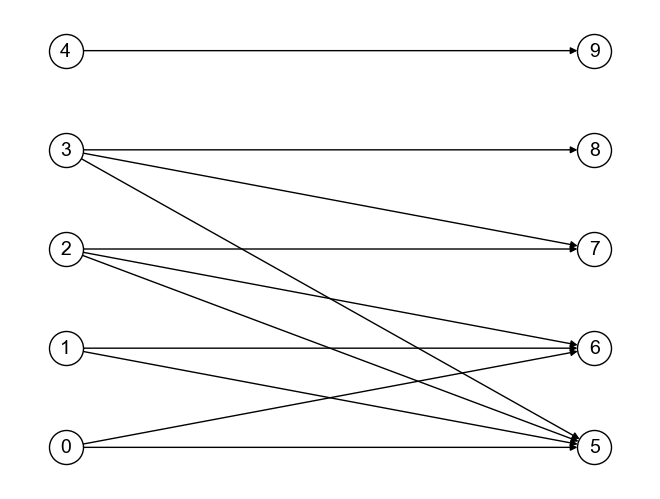

In [6]:
G_bipartite = nx.DiGraph()
G_bipartite.add_nodes_from([0, 1, 2, 3, 4], bipartite=0)
G_bipartite.add_nodes_from([5, 6, 7, 8, 9], bipartite=1)
G_bipartite.add_edges_from([
    (0, 5), (0, 6),
    (1, 5), (1, 6),
    (2, 5), (2, 6), (2, 7),
    (3, 5), (3, 7), (3, 8),
    (4, 9)
])

pos = nx.bipartite_layout(G_bipartite, [0, 1, 2, 3, 4])
nx.draw(G_bipartite, pos, **DRAW_CONFIG)

上記グラフ$G_{bipartite}$に対して，HITSアルゴリズムを具体的に実行してみよう．
グラフ$G_{bipartite}$の各ノードのハブ値，オーソリティ値を求めるPythonコードは，以下のように書ける．

In [7]:
import networkx as np
import numpy as np
from sklearn.preprocessing import normalize


# グラフを定義
G_bipartite = nx.DiGraph()
G_bipartite.add_nodes_from([0, 1, 2, 3, 4], bipartite=0)
G_bipartite.add_nodes_from([5, 6, 7, 8, 9], bipartite=1)
G_bipartite.add_edges_from([
    (0, 5), (0, 6),
    (1, 5), (1, 6),
    (2, 5), (2, 6), (2, 7),
    (3, 5), (3, 7), (3, 8),
    (4, 9)
])

# グラフ中のノード数
N = G_bipartite.number_of_nodes()

# 隣接行列を取得
A = nx.adjacency_matrix(G_bipartite).toarray()

# ハブ値ベクトルを初期化
h = np.ones(N).reshape(-1, 1)

# オーソリティ値ベクトルを初期化
a = np.ones(N).reshape(-1, 1)

# ハブ値，オーソリティ値の更新（100回繰り返せば十分に収束する）
for i in range(100):
    a_new = np.dot(A.T, h)
    h_new = np.dot(A, a)

    # L1正規化
    a = normalize(a_new, norm='l1', axis=0)
    h = normalize(h_new, norm='l1', axis=0)

h, a

(array([[2.32408121e-01],
        [2.32408121e-01],
        [3.02775638e-01],
        [2.32408121e-01],
        [2.22745517e-45],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]]),
 array([[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [3.94448725e-01],
        [3.02775638e-01],
        [2.11102551e-01],
        [9.16730868e-02],
        [2.63585055e-45]]))

PageRankと同様，HITSアルゴリズムもNetworkxライブラリに`hits`関数と名前で実装されている．
HITSを用いてハブ値，オーソリティ値を計算したい場合，以下のコードを実行すればよい．

In [8]:
h, a = nx.hits(G_bipartite)
h, a

({0: 0.23240812075600176,
  1: 0.23240812075600176,
  2: 0.3027756377319947,
  3: 0.2324081207560018,
  4: 1.0138806537416996e-17,
  5: 0.0,
  6: 0.0,
  7: 0.0,
  8: 0.0,
  9: 0.0},
 {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.39444872453601065,
  6: 0.3027756377319946,
  7: 0.21110255092797867,
  8: 0.09167308680401609,
  9: 3.0416419612250984e-17})

---
## クイズ

### Q1: デッドリンク，スパイダートラップのあるグラフ

![](img/deadend-and-spidertrap.jpg)

上記の各グラフに対してシンプルなPageRankアルゴリズムを適用すると，どのような値に収束するか．
Pythonコードを書いて確かめなさい．

In [ ]:
import networkx as nx

# グラフの定義
G_deadend = nx.DiGraph([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'A'), ('B', 'D'),
    ('D', 'B'),
])

G_spidertrap = nx.DiGraph([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'A'), ('B', 'D'),
    ('C', 'C'), ('D', 'B'),
])


# Write your codes below


### Q2: PageRank実装
NetworkXの`pagerank`関数を用いずに，（完全な）PageRank値を計算する関数`calc_pagerank`を実装しなさい．
なお，`calc_pagerank`関数の引数は以下としなさい：
- 第1引数: NetworkX形式のグラフ$G$
- 第2引数: $\alpha$パラメータ．デフォルト値は0.85
- 第3引数: 更新回数．デフォルト値は50

### Q3: 江戸時代の人物

[コチラ](https://raw.githubusercontent.com/hontolab-courses/graph-analysis-lecturenote/refs/heads/main/content/data/edo.gml)からダウンロードできるファイル（`edo.gml`）は，Wikipediaの[江戸時代の人物一覧](https://ja.wikipedia.org/wiki/%E6%B1%9F%E6%88%B8%E6%99%82%E4%BB%A3%E3%81%AE%E4%BA%BA%E7%89%A9%E4%B8%80%E8%A6%A7)に掲載された歴史上の人物をノード，人物記事から人物記事へのリンクをエッジとするグラフデータを格納したものである．
例えば，[江戸時代の人物一覧](https://ja.wikipedia.org/wiki/%E6%B1%9F%E6%88%B8%E6%99%82%E4%BB%A3%E3%81%AE%E4%BA%BA%E7%89%A9%E4%B8%80%E8%A6%A7)に掲載されている[徳川家康](https://ja.wikipedia.org/wiki/%E5%BE%B3%E5%B7%9D%E5%AE%B6%E5%BA%B7)の記事には，同じく江戸時代の人物一覧に掲載された[伊達政宗](https://ja.wikipedia.org/wiki/%E4%BC%8A%E9%81%94%E6%94%BF%E5%AE%97)への記事へのリンクが存在するため，グラフ中では徳川家康ノードから伊達政宗ノードへエッジが存在する．

※ 江戸時代に活躍した人物でも[江戸時代の人物一覧](https://ja.wikipedia.org/wiki/%E6%B1%9F%E6%88%B8%E6%99%82%E4%BB%A3%E3%81%AE%E4%BA%BA%E7%89%A9%E4%B8%80%E8%A6%A7)に掲載されていない人物も存在する．例えば，坂本龍馬は[幕末の人物一覧](https://ja.wikipedia.org/wiki/%E5%B9%95%E6%9C%AB%E3%81%AE%E4%BA%BA%E7%89%A9%E4%B8%80%E8%A6%A7)には掲載されているが，江戸時代の人物一覧には掲載されていない．

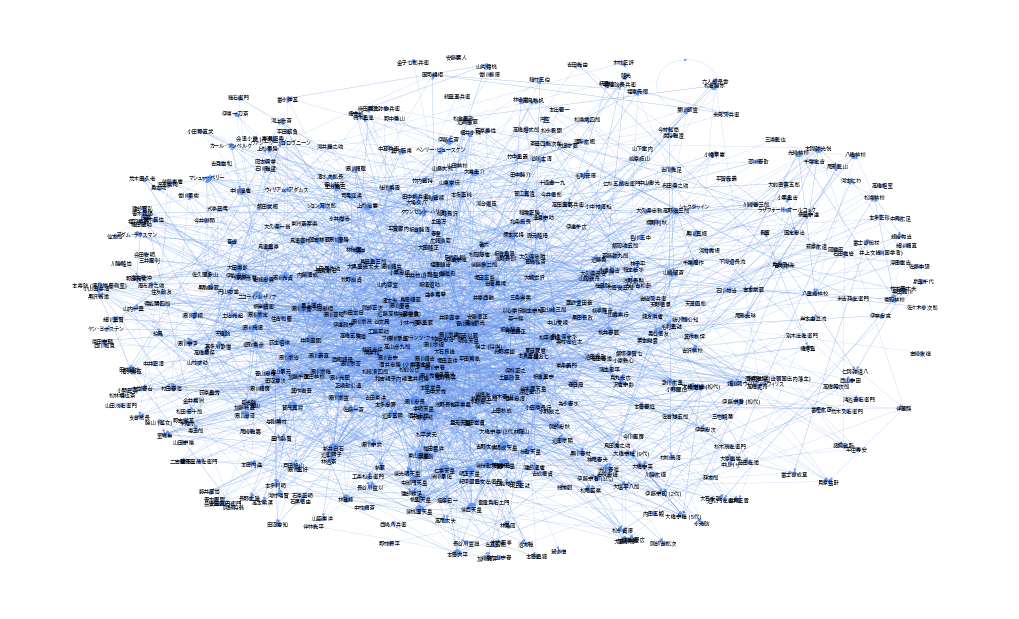

In [9]:
import matplotlib.pyplot as plt

EDO_DRAW_CONFIG = {
    'node_size': 5,
    'arrowsize': 5,    
    'font_size': 4,
    'with_labels': True,
    'node_color': 'cornflowerblue',
    'edge_color': 'cornflowerblue',
    'width': 0.10,
    'font_family': 'IPAPGothic'
}


G_edo = nx.read_gml("data/edo.gml")

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G_edo, iterations=50, seed=1234, k=0.5)
nx.draw(G_edo, pos, **EDO_DRAW_CONFIG)
plt.show()

上のグラフ$G_{edo}$は，ダウンロードしたファイル`edo.gml`をNetworkXで読み込み，可視化したものである．
グラフ$G_{edo}$にPageRankアルゴリズムを適用し，江戸時代の人物のPageRankスコア上位30名を求めなさい．

なお，[コチラ](https://raw.githubusercontent.com/hontolab-courses/graph-analysis-lecturenote/refs/heads/main/content/data/edo.gml)からダウンロードしたファイル`edo.gml`をNetworkXで読み込むには，以下のコードを実行するとよい．

In [ ]:
# ダウンロードしたファイルは`data/edo.gml`にあるとする（ファイルの保存先はどこでもよい）
G_edo = nx.read_gml("data/edo.gml")

### Q4: Biased PageRank

オリジナルのPageRankアルゴリズムでは，ページに直接ジャンプする行動に対応する項のベクトルの要素値（以下の式の第2項）は，すべて$\frac{1}{N}$としていた．
このベクトルを調整することで，特定ノードの影響を強めてPageRankの値を補正することができる．

$$
\boldsymbol{p}_{n+1} = \alpha \boldsymbol{M}^T \boldsymbol{p}_{n} + (1 - \alpha) \frac{\boldsymbol{e}}{N}
$$

Q3のPageRankの計算にて，直接ジャンプ項のベクトルの要素値について，
- 賴山陽，本居宣長，杉田玄白，関孝和に対応する値は$\frac{1}{4}$に
- 上記人物以外についてはゼロ

になるように設定し，再度PageRankを計算し，その値の上位30位の人物を求めなさい．


ヒント: NetworkXの`pagerank`関数を用いず自力で行列計算で行う場合は，賴山陽，本居宣長，杉田玄白，関孝和の値がベクトルの何番目に対応するかを調べる必要がある．
